## Pregunta 6

In [84]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Define Plot style
plt.style.use(['science', 'no-latex'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': True,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    # 'text.usetex': True,               # Optional: needs LaTeX installed
    # 'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

import matplotlib.cm as cm

In [85]:
H0 = 67.4
omega_m = 0.315
omega_ch2 = 0.12
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()

pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2 = omega_ch2, tau = tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [92]:
results = camb.get_results(pars)

z = np.linspace(0,1e4,30000)
om_cdm = results.get_Omega('cdm', z=z)
om_bar = results.get_Omega('baryon',z=z)
om_nu = results.get_Omega('nu', z=z)
om_matter = om_cdm + om_bar+ om_nu

om_K = results.get_Omega('K',z=z)
om_pho = results.get_Omega('photon',z=z)
om_neutrino = results.get_Omega('neutrino',z=z)
om_rad = om_pho + om_neutrino
om_de = results.get_Omega('de',z=z)

om_tot = results.get_Omega('tot',z=z)


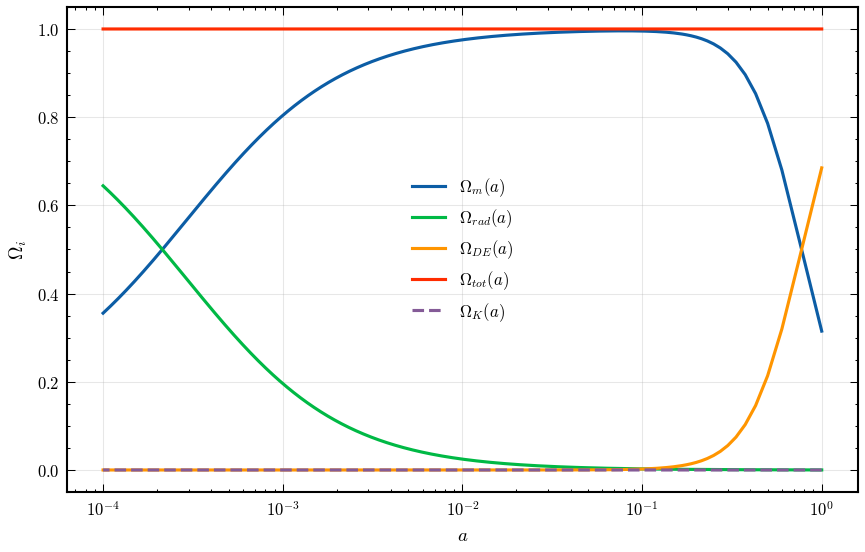

In [94]:
a = 1/(z+1)


plt.semilogx(a,om_matter, label = r'$\Omega_{m}(a)$')
plt.semilogx(a,om_rad, label = r'$\Omega_{rad}(a)$')
plt.semilogx(a,om_de, label = r'$\Omega_{DE}(a)$')
plt.semilogx(a,om_tot, label = r'$\Omega_{tot}(a)$')
plt.semilogx(a,om_K,'--', label = r'$\Omega_{K}(a)$')

plt.xlabel(r'$a$')
plt.ylabel(r'$\Omega_{i}$')
plt.legend()

## Pregunta 7


La forma analitica de las distancias es:

$$D_{A}(z) = \frac{f_{k}(\chi)}{1 + z} , \space D_{L} = (1+z) f_{k}(\chi)$$

donde:
$$ \chi(z) = \int_{0}^{z} \frac{dx}{E(x)} , \space E(z) = \frac{H(z)}{H_{0}}$$

La funcion de curvatura $f_{k}(\chi)$:


$$
f_{k}(\chi) = 
\begin{cases}
\dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} >0 \\
\dfrac{c}{H_{0}}\;\chi & \Omega_{K,0} = 0, \\
\dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} < 0.

\end{cases}
$$
Con un componente de radiacion, materia, energia oscura (con ecuacion de estado w) y curvatura
$$
H^{2}(z) = H_{0}^{2} \left[ \Omega_{r,0}(1 +z )^{4} + \Omega_{m,0}(1 +z)^{3} + \Omega_{\Lambda,0}(1 +z)^{3(1+\omega)} + \Omega_{K,0}(1+z)^{2}\right]
$$

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [98]:
h0 = 67.4
c = 300000          #km/s
w = -1
# omega_k = 0
#omega_r = omega_r*(1 +z)**4 

In [112]:
def H2_z(z,omega_m, omega_lambda):
    if w==-1:
        return  (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda)
    else:
        return (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda*(1+z)**(3*(1+w)))

# def d_A(fk,z):
#     return fk/(1+z)

# def d_L(fk,z):
#     return (1 +z)*fk
def omega_k(omega_m, omega_lambda):
    return 1 - omega_m -omega_lambda

def E_z(z,  omega_m, omega_lambda):
    return np.sqrt(H2_z(z, omega_m, omega_lambda))/h0

# def chi(z,omega_m, omega_lambda):

#     dz = np.diff(z)[-1]
#     return np.cumsum(dz/E_z(z, omega_m, omega_lambda))[-1]

def chi(z, omega_m, omega_lambda):
    # print(omega_m)
    def integrand(z):
        return  1.0 / E_z(z, omega_m, omega_lambda)
    integral, _ = quad( integrand, z[0],z[-1])
    return integral
def f_k(z, omega_m, omega_lambda):
    

    f = np.zeros(shape=(len(omega_m), len(omega_lambda)))
    # print(f)

    for i in range(len(omega_m)):
        for j in range(len(omega_lambda)):

            o_k = omega_k(omega_m[i], omega_lambda[j])
            # print(o_k)
            # print(o_k)

            if o_k < 0:
                term1 = c/(h0* np.sqrt(-o_k)) *np.sin(np.sqrt(-o_k)* chi(z,omega_m[i], omega_lambda[j]))
                # print('case 1')
            
            if o_k == 0:
                term1 = c/(h0) *chi(z,omega_m[i], omega_lambda[j])
                # print('case 2')
            
            if o_k > 0:
                term1 =  c/(h0* np.sqrt(o_k)) *np.sinh(np.sqrt(o_k)* chi(z,omega_m[i], omega_lambda[j]))
                # print('case 3')
    
            f[j,i]=  term1
            # print(term1)
            # print(f)
    
    return f

In [123]:
omega_m = np.linspace(0, 3,100)
omega_lambda = np.linspace(-1,3, 100)

In [124]:
z = np.linspace(0.0001,1,100)
fk = f_k(z,omega_m, omega_lambda)

z_1 = np.linspace(0.001,1100,100)
fk_1 = f_k(z_1,omega_m, omega_lambda)

/var/folders/lp/pz0pr1y55xvbxt8nxcc4sl100000gn/T/ipykernel_7011/3093134058.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(H2_z(z, omega_m, omega_lambda))/h0
/var/folders/lp/pz0pr1y55xvbxt8nxcc4sl100000gn/T/ipykernel_7011/3093134058.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad( integrand, z[0],z[-1])


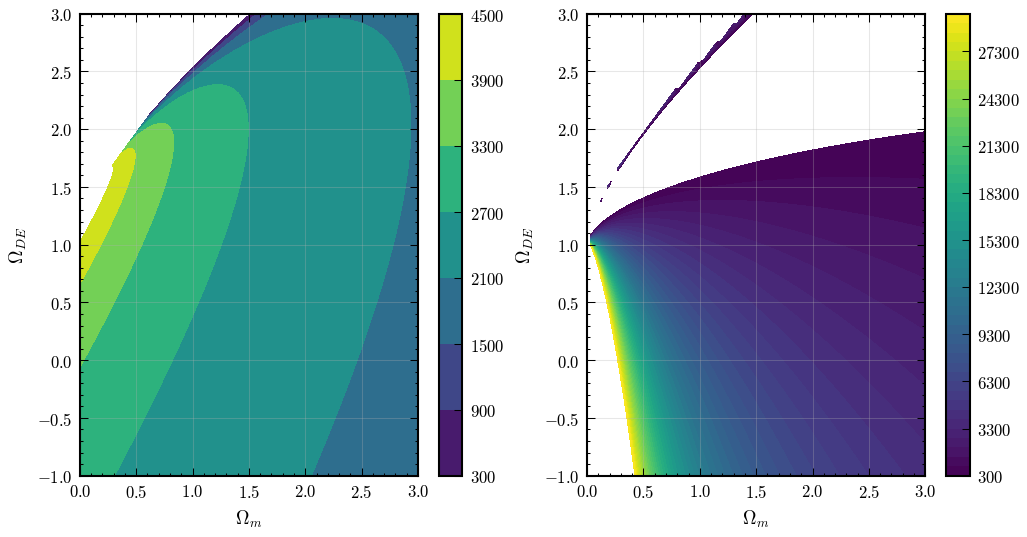

In [146]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.contourf(omega_m, omega_lambda,fk ,levels = np.arange(300,5000,600))
plt.xlabel(r'$\Omega_{m}$')
plt.ylabel(r'$\Omega_{DE}$')
plt.colorbar()


plt.subplot(1,2,2)
plt.contourf(omega_m, omega_lambda,fk_1 ,levels = np.arange(300,30000,600))


plt.colorbar()
plt.xlabel(r'$\Omega_{m}$')
plt.ylabel(r'$\Omega_{DE}$')
plt.show()
# plt.imshow(np.log10(fk), origin='lower')